<a href="https://colab.research.google.com/github/igomezv/DataScienceIntermedio/blob/main/7-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de lenguaje natural (NLP)

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/NLP_pipeline.jpeg)
Fuente de la imagen: Turing.com

## 1. Segmentación de enunciados

![](https://s3.amazonaws.com/work-sample-images/blog_segmentation.jpg)
Fuente de la imagen: tm-town.com

## 2.  Tokenization

![](https://miro.medium.com/max/1400/1*UhfwmhMN9sdfcWIbO5_tGg.jpeg)
Fuente de la imagen: Medium.com

## 3. Stemming y  4. Lemmatization

![](https://miro.medium.com/max/640/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)
Fuente de la imagen: medium.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/stemmingvslemma.png)
Fuente de la imagen: businessprocessincubator.com


## 5. Stop words
![](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png)
Fuente de la imagen: openclassrooms.com

## 6. Dependency parsing

(Análisis de dependencia). Se utiliza principalmente para averiguar cómo se relacionan entre sí todas las palabras de una oración. Para encontrar la dependencia, podemos construir un árbol y asignar una sola palabra como palabra principal. El verbo principal de la oración actuará como el nodo raíz.
![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)
Fuente: RealPython.


## 7. Part of speech tagging

(Etiquetado de parte del discurso).

![](https://miro.medium.com/max/640/1*004yTJkoLe7g8KC8V7-ULw.png)
Fuente de la imagen: medium.com

![](https://www.researchgate.net/profile/Cigdem-Aytekin-3/publication/337773927/figure/fig1/AS:832915193733120@1575593865084/Natural-Language-Processing-Topics-Adali-2013-4.png)
Fuente de la imagen: Sutcu, Cem Sefa & Aytekin, Cigdem. (2019)

![](https://files.realpython.com/media/NLP-for-Beginners-Pythons-Natural-Language-Toolkit-NLTK_Watermarked.16a787c1e9c6.jpg)
Fuente de la imagen: realpython.com

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 1. Segmentación de enunciados

In [2]:
text = "An ambitious campus expansion plan was proposed by Fr. Vernon F. Gallagher in 1952. Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law. It was during the tenure of F. Henry J. McAnulty that Fr. Gallagher's ambitious plans were put to action."

In [3]:
# Training a new model with the text.
tokenizer = PunktSentenceTokenizer()
tokenizer.train(text)

In [4]:
# It automatically learns the abbreviations.
tokenizer._params.abbrev_types

set()

In [5]:
# Use the customized tokenizer.
tokenizer.tokenize(text)

['An ambitious campus expansion plan was proposed by Fr.',
 'Vernon F. Gallagher in 1952.',
 'Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law.',
 'It was during the tenure of F. Henry J. McAnulty that Fr.',
 "Gallagher's ambitious plans were put to action."]

### Tokenization

In [6]:
sent = "I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!"

In [7]:
print(word_tokenize(sent))

['I', 'will', 'walk', '500', 'miles', 'and', 'I', 'would', 'walk', '500', 'more', ',', 'just', 'to', 'be', 'the', 'man', 'who', 'walks', 'a', 'thousand', 'miles', 'to', 'fall', 'down', 'at', 'your', 'door', '!']


In [8]:
print(sent_tokenize(sent))

['I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!']


#### Stemming vs lemmatize

In [9]:
#Stemming vs lemmatize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

s_stemmer = SnowballStemmer(language='english')
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


**Ejercicio: Probar con otra lista de palabras**

In [10]:
s_stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
words = ['run','runner','running','ran','runs']

for word in words:
    print("Stemmer:")
    print(word+' --> '+s_stemmer.stem(word))
    print("Lemmatizer")
    print(word+' --> '+lemmatizer.lemmatize(word, pos='v'))

Stemmer:
run --> run
Lemmatizer
run --> run
Stemmer:
runner --> runner
Lemmatizer
runner --> runner
Stemmer:
running --> run
Lemmatizer
running --> run
Stemmer:
ran --> ran
Lemmatizer
ran --> run
Stemmer:
runs --> run
Lemmatizer
runs --> run


### Ejemplo: combinando web scrapping con NLP

In [11]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [12]:
url = "http://www.oralytics.com/"
html = urlopen(url).read()
print(html)

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Oralytics</title>\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<link rel="pingback" href="https://oralytics.com/xmlrpc.php">\n\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<meta name="google-site-verification" content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" />\n<meta name="msvalidate.01" content="0BD71865719D64AC53DCB30DFD743DCA" />\n\n<!-- Async WordPress.com Remote Login -->\n<script id="wpcom_remote_login_js">\nvar wpcom_remote_login_extra_auth = \'\';\nfunction wpcom_remote_login_remove_dom_node_id( element_id ) {\n\tvar dom_node = d

In [13]:
soup = BeautifulSoup(html)
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Oralytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->
<script id="wpcom_remote_login_js">
var wpcom_remote_login_extra_auth = '';
function wpcom_remote_login_remove_dom_node_id( element_id ) {
	var dom_node = document.getElementById( element_id

In [14]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Oralytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->

<link href="//ced.sascdn.com" rel="dns-prefetch"/>
<link href="//s1.wp.com" rel="dns-prefetch"/>
<link href="//s2.wp.com" rel="dns-prefetch"/>
<link href="//s0.wp.com" rel="dns-prefetch"/>


In [15]:
text = soup.get_text()
print(text)

 



Oralytics




















































































 
 


















Oralytics
By Brendan Tierney


-




Blog
My Books
Consulting Services
Data Sets

Scottish Whisky – Updated
Irish Whiskey Distilleries
CAO Points & Profiling since 2015
Leaving Certificate grade per Subject since 2015
Data Sets for Data Analytics/Science


My Shop
Contact Me
Oracle Magazine Collection
 




Python for OCI installation and configuration 

Posted on October 24, 2023 Updated on October 12, 2023 

Having set up your Oracle Cloud account and perhaps initiated some services, such as an Autonomous Database or an AI Service, you have some options with how you’ll interact with those services. The first is to use the online interfaces and tools for them. Another is to access these OCI services from your local PC or laptop. This latter method gives you greater flexibility for accessing these services, automating various tasks and building out some applications.

In [16]:
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = 'n'.join(chunk for chunk in chunks if chunk)

print(text)

OralyticsnOralyticsnBy Brendan Tierneyn-nBlognMy BooksnConsulting ServicesnData SetsnScottish Whisky – UpdatednIrish Whiskey DistilleriesnCAO Points & Profiling since 2015nLeaving Certificate grade per Subject since 2015nData Sets for Data Analytics/SciencenMy ShopnContact MenOracle Magazine CollectionnPython for OCI installation and configurationnPosted on October 24, 2023 Updated on October 12, 2023nHaving set up your Oracle Cloud account and perhaps initiated some services, such as an Autonomous Database or an AI Service, you have some options with how you’ll interact with those services. The first is to use the online interfaces and tools for them. Another is to access these OCI services from your local PC or laptop. This latter method gives you greater flexibility for accessing these services, automating various tasks and building out some applications. This post will step through how to install the necessary Python library, how to configure for connecting to OCI and will demo som

In [17]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{'being', 'before', 'her', 'or', 'do', 'couldn', 'will', "should've", 'me', "shouldn't", 'o', 'of', 'if', "isn't", "won't", "hadn't", "you're", 'so', 'because', 'by', 'then', 'too', 'and', 'm', 'hers', "doesn't", 'ain', "wouldn't", 'yourselves', 'hasn', 'shouldn', 'in', "that'll", 'but', 'your', 'down', 'ours', 'as', "you'd", 'any', 'there', 'you', 'now', 'yours', 'into', 'between', 'here', 'which', "didn't", 'isn', 'a', 'herself', 'these', 'not', 'weren', 'having', 'they', 'some', 'my', 'himself', 'doesn', 'below', 'themselves', 'over', 'for', 'it', 'on', "aren't", "mightn't", 're', 'about', 'only', 'has', 'other', 'should', 'ourselves', 'with', "you've", 'up', 'ma', 'just', 'myself', 'she', 'didn', 'he', 'them', 'mustn', 'its', 'after', 'again', 'once', 'y', 'from', 'how', 'our', 'such', 'why', 'needn', "you'll", 'what', 'doing', 'been', "mustn't", 'mightn', 'against', "shan't", 'most', "couldn't", 'above', 'during', 'we', 'does', 'hadn', "hasn't", "it's", 'more', 've', 'wouldn', 'ea

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
len(words), words

(8331,
 ['OralyticsnOralyticsnBy',
  'Brendan',
  'Tierneyn-nBlognMy',
  'BooksnConsulting',
  'ServicesnData',
  'SetsnScottish',
  'Whisky',
  '–',
  'UpdatednIrish',
  'Whiskey',
  'DistilleriesnCAO',
  'Points',
  '&',
  'Profiling',
  'since',
  '2015nLeaving',
  'Certificate',
  'grade',
  'per',
  'Subject',
  'since',
  '2015nData',
  'Sets',
  'for',
  'Data',
  'Analytics/SciencenMy',
  'ShopnContact',
  'MenOracle',
  'Magazine',
  'CollectionnPython',
  'for',
  'OCI',
  'installation',
  'and',
  'configurationnPosted',
  'on',
  'October',
  '24',
  ',',
  '2023',
  'Updated',
  'on',
  'October',
  '12',
  ',',
  '2023nHaving',
  'set',
  'up',
  'your',
  'Oracle',
  'Cloud',
  'account',
  'and',
  'perhaps',
  'initiated',
  'some',
  'services',
  ',',
  'such',
  'as',
  'an',
  'Autonomous',
  'Database',
  'or',
  'an',
  'AI',
  'Service',
  ',',
  'you',
  'have',
  'some',
  'options',
  'with',
  'how',
  'you',
  '’',
  'll',
  'interact',
  'with',
  'those'

In [19]:
# Quita mayusculas, puntuación y numeros
wordsFiltered = [word.lower() for word in words if word.isalpha()]
len(wordsFiltered), wordsFiltered

(6399,
 ['oralyticsnoralyticsnby',
  'brendan',
  'booksnconsulting',
  'servicesndata',
  'setsnscottish',
  'whisky',
  'updatednirish',
  'whiskey',
  'distilleriesncao',
  'points',
  'profiling',
  'since',
  'certificate',
  'grade',
  'per',
  'subject',
  'since',
  'sets',
  'for',
  'data',
  'shopncontact',
  'menoracle',
  'magazine',
  'collectionnpython',
  'for',
  'oci',
  'installation',
  'and',
  'configurationnposted',
  'on',
  'october',
  'updated',
  'on',
  'october',
  'set',
  'up',
  'your',
  'oracle',
  'cloud',
  'account',
  'and',
  'perhaps',
  'initiated',
  'some',
  'services',
  'such',
  'as',
  'an',
  'autonomous',
  'database',
  'or',
  'an',
  'ai',
  'service',
  'you',
  'have',
  'some',
  'options',
  'with',
  'how',
  'you',
  'll',
  'interact',
  'with',
  'those',
  'services',
  'the',
  'first',
  'is',
  'to',
  'use',
  'the',
  'online',
  'interfaces',
  'and',
  'tools',
  'for',
  'them',
  'another',
  'is',
  'to',
  'acces

In [20]:
# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
len(filtered_words), filtered_words

(3344,
 ['oralyticsnoralyticsnby',
  'brendan',
  'booksnconsulting',
  'servicesndata',
  'setsnscottish',
  'whisky',
  'updatednirish',
  'whiskey',
  'distilleriesncao',
  'points',
  'profiling',
  'since',
  'certificate',
  'grade',
  'per',
  'subject',
  'since',
  'sets',
  'data',
  'shopncontact',
  'menoracle',
  'magazine',
  'collectionnpython',
  'oci',
  'installation',
  'configurationnposted',
  'october',
  'updated',
  'october',
  'set',
  'oracle',
  'cloud',
  'account',
  'perhaps',
  'initiated',
  'services',
  'autonomous',
  'database',
  'ai',
  'service',
  'options',
  'interact',
  'services',
  'first',
  'use',
  'online',
  'interfaces',
  'tools',
  'another',
  'access',
  'oci',
  'services',
  'local',
  'pc',
  'laptop',
  'latter',
  'method',
  'gives',
  'greater',
  'flexibility',
  'accessing',
  'services',
  'automating',
  'various',
  'tasks',
  'building',
  'applications',
  'post',
  'step',
  'install',
  'necessary',
  'python',
  

### Documentación de word cloud: http://amueller.github.io/word_cloud/

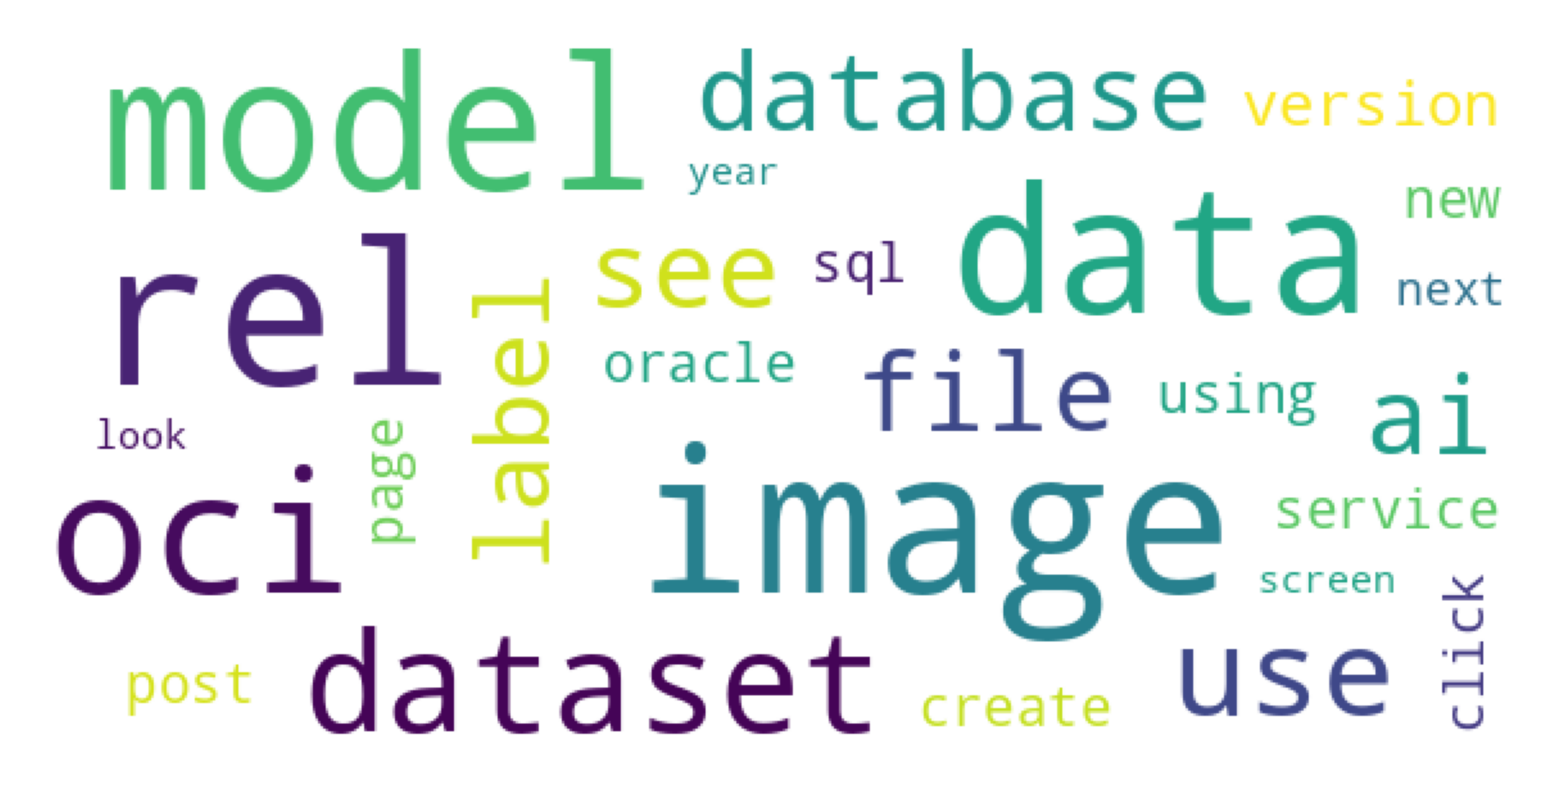

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(max_words=100, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=200, height=100,
random_state=1)

wc.generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

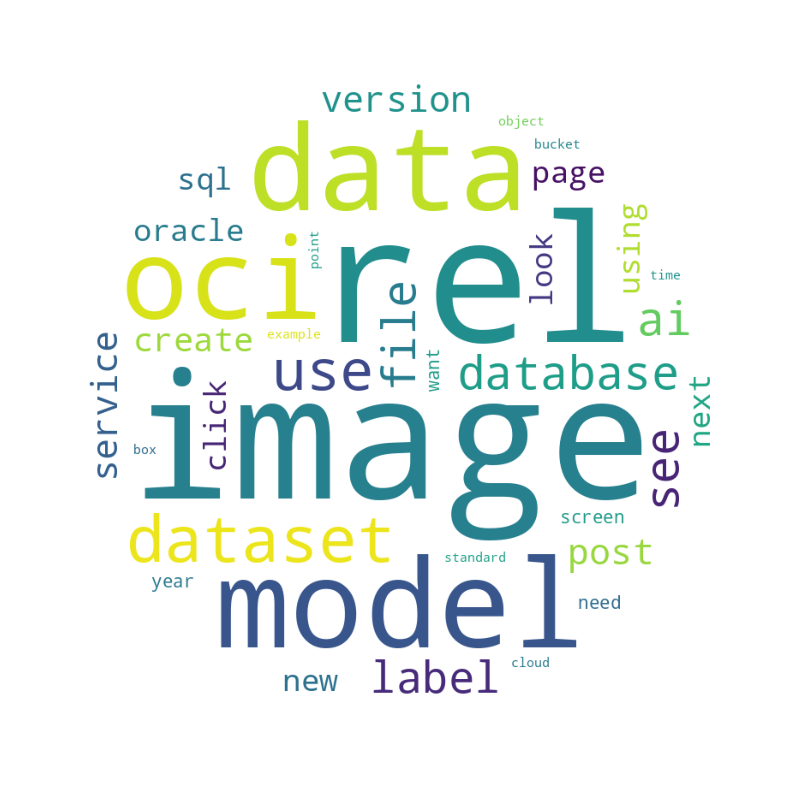

In [22]:
import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(max_words=100, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=200, height=100,
random_state=1, mask=mask)

wc.generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

#### Ejercicio: usar otra página u archivo de texto para hacer nube de palabras

In [23]:
url = "https://www.elmundo.es/index.html"
html = urlopen(url).read()
soup = BeautifulSoup(html)

In [24]:
text = soup.get_text()
# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = 'n'.join(chunk for chunk in chunks if chunk)


In [25]:
words = word_tokenize(text)

In [26]:
# Quita mayusculas, puntuación y numeros
wordsFiltered = [word.lower() for word in words if word.isalpha()]

#### Usemos las stop words en español

In [27]:
# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('spanish')]

In [28]:
filtered_words

['mundo',
 'diario',
 'online',
 'líder',
 'información',
 'españolnes',
 'noticiaguerra',
 'israel',
 'gazaamnistíamoneda',
 'leonorcollar',
 'carlos',
 'iiiguerra',
 'rusia',
 'ucraniavodafoneana',
 'botínciclogénesislaura',
 'escanessupermercadoshalloween',
 'lunar',
 'noviembrealcaraz',
 'safiulinqué',
 'plantar',
 'noviembrecopa',
 'reyprogramación',
 'tvúltimas',
 'noticiascalendario',
 'laboral',
 'madrid',
 'lotería',
 'navidad',
 'octubre',
 'noticiansaltar',
 'navegación',
 'principal',
 'pulse',
 'enter',
 'nsaltar',
 'contenido',
 'pulse',
 'enter',
 'sesiónnbuscadorncompartir',
 'facebookncompartir',
 'twitternenviar',
 'emailnseccionesnespañanespañaneleccionesnmadridnandalucíansevillanmálaganbalearesnibizancastilla',
 'leonndiario',
 'valladolidncataluñancomunidad',
 'valencianancastellón',
 'díanpaís',
 'vasconel',
 'panel',
 'directorncolumnistasnblogsnactualidad',
 'económicanactualidad',
 'económicandinero',
 'ricosninternacionalninternacionalneuropanaméricanasianáfri

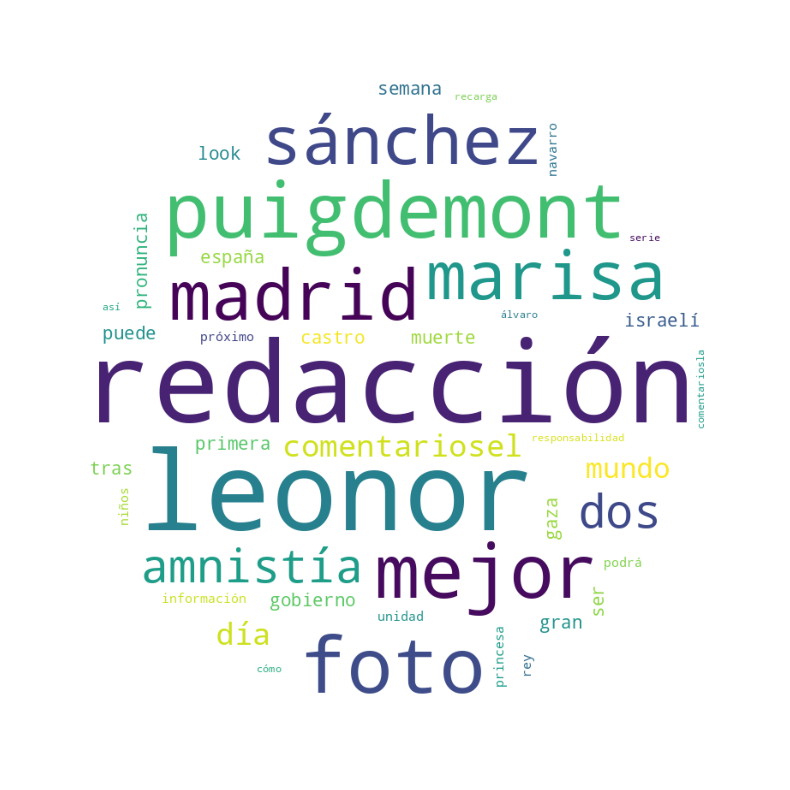

In [29]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(max_words=100, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=200, height=100,
random_state=1, mask=mask)

wc.generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Spacy

![](https://miro.medium.com/max/720/1*5RZ1Saa-R7LKN30UoTL5ZA.png)
Fuente: Medium

En colab:
    
    !python -m spacy download es_core_news_sm

    !python -m spacy download en_core_web_sm

En local y remoto:

    python3 -m spacy download es_core_news_sm

    python3 -m spacy download en_core_web_sm

In [30]:
!python -m spacy download es_core_news_sm

!python -m spacy download en_core_web_sm

2023-10-31 18:58:02.529342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 18:58:02.529427: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 18:58:02.529480: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 18:58:02.551919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 18:58:05.161830: W tensorflow/compiler/

In [31]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [32]:
import spacy
nlp_eng = spacy.load('en_core_web_sm')
nlp_es = spacy.load('es_core_news_sm')

In [33]:
doc = nlp_es("Vamos por unos tacos!")
for token in doc:
    print(token.text)

Vamos
por
unos
tacos
!


In [34]:
sentence = nlp_eng(u'Three guilty as court finds Russia-controlled group downed airliner')

for token in sentence:
    print(token.text, end=' | ')

Three | guilty | as | court | finds | Russia | - | controlled | group | downed | airliner | 

In [35]:
for ent in sentence.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Three - CARDINAL - Numerals that do not fall under another type
Russia - GPE - Countries, cities, states


In [36]:
sentence = nlp_es(u'Se disipa riesgo de enfrentamiento entre Rusia y la OTAN ')

for token in sentence:
    print(token.text, end=' | ')

Se | disipa | riesgo | de | enfrentamiento | entre | Rusia | y | la | OTAN | 

In [37]:
for ent in sentence.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Rusia - LOC - Non-GPE locations, mountain ranges, bodies of water
OTAN - ORG - Companies, agencies, institutions, etc.


In [38]:
from spacy import displacy
doc = nlp_eng(u'Over last few years USA generates $6 million revenue.')
displacy.render(doc, style='ent', jupyter=True)

In [39]:
doc = nlp_es(u'En el último año, el producto interno de México fue de $1,293.00 MXN')
displacy.render(doc, style='ent', jupyter=True)

In [40]:
# ver dependencias
from spacy import displacy
document = nlp_eng(u'Bangladesh is a beautiful country')
displacy.render(document, style='dep', jupyter=True, options={'distance': 110})

In [41]:
document = nlp_es(u'Mexicanos al grito de guerra, al sonoro rugir del cañón')
displacy.render(document, style='dep', jupyter=True, options={'distance': 110})

In [42]:
## Lematizacion
doc = nlp_eng(u"He is a runner running in a competition because he loves to run since he ran today")

for token in doc:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

He           PRON   1655312771067108281    he
is           AUX    10382539506755952630   be
a            DET    11901859001352538922   a
runner       NOUN   12640964157389618806   runner
running      VERB   12767647472892411841   run
in           ADP    3002984154512732771    in
a            DET    11901859001352538922   a
competition  NOUN   4661638505416061516    competition
because      SCONJ  16950148841647037698   because
he           PRON   1655312771067108281    he
loves        VERB   3702023516439754181    love
to           PART   3791531372978436496    to
run          VERB   12767647472892411841   run
since        SCONJ  10066841407251338481   since
he           PRON   1655312771067108281    he
ran          VERB   12767647472892411841   run
today        NOUN   11042482332948150395   today


In [43]:
print(nlp_eng.Defaults.stop_words)

{'or', 'may', 'if', 'of', 'used', 'least', 'becoming', 'fifty', 'so', 'too', 'could', 'down', 'somewhere', 'anyone', 'there', 'thru', 'you', 'now', 'serious', 'between', 'elsewhere', 'everyone', 'sometime', 'except', 'some', 'himself', 'below', 'for', 'perhaps', 'three', 'much', 'unless', 'neither', 'never', 'about', 'has', 'amongst', 'would', 'up', 'forty', 'myself', 'rather', 'he', 'how', 'why', 'part', 'nobody', 'what', 'whose', 'doing', 'per', 'beyond', 'although', 'two', 'we', 'due', 'go', 'becomes', 'nine', 'amount', 'latterly', 'behind', 'further', 'this', 'really', 'name', 'using', 'hundred', 'everywhere', 'wherein', 'mostly', 'the', 'had', 'seeming', 'yourself', 'whom', 'empty', 'to', 'fifteen', 'did', 'yet', 'several', 'be', 'give', 'say', 'next', 'can', 'something', 'often', 'made', 'through', 'less', 'until', '‘s', 'before', 'sometimes', 'put', 'either', 'move', 'whereupon', 'enough', "'m", 'another', 'because', 'then', '‘ve', 'in', 'else', 'various', 'your', 'everything', 

In [44]:
print(nlp_es.Defaults.stop_words)

{'esos', 'da', 'fuera', 'la', 'tanto', 'uno', 'esto', 'quién', 'conmigo', 'diferentes', 'dan', 'puede', 'fin', 'solo', 'eramos', 'lo', 'suyas', 'cuáles', 'tuvo', 'indicó', 'fueron', 'ésas', 'quiere', 'ahi', 'diez', 'vaya', 'solos', 'dias', 'modo', 'estados', 'están', 'vez', 'medio', 'muy', 'dijo', 'conseguimos', 'cierta', 'estaban', 'haber', 'somos', 'ello', 'cuenta', 'podeis', 'mientras', 'queremos', 'adelante', 'cual', 'último', 'tambien', 'cómo', 'aqui', 'posible', 'quienes', 'sabe', 'éstos', 'del', 'entre', 'ir', 'verdad', 'ellos', 'he', 'podría', 'cuantas', 'podrias', 'dieron', 'enfrente', 'estará', 'yo', 'cada', 'contra', 'una', 'mías', 'cuál', 'sería', 'junto', 'también', 'ese', 'nadie', 'ningún', 'esta', 'excepto', 'en', 'muchos', 'de', 'tú', 'allí', 'primero', 'qeu', 'hacemos', 'qué', 'quien', 'usas', 'nuevas', 'aquéllos', 'será', 'vosotras', 'debe', 'aun', 'consiguen', 'mias', 'ver', 'gran', 'se', 'aquéllas', 'apenas', 'últimos', 'los', 'podrían', 'tampoco', 'siempre', 'verda

In [45]:
nlp_eng.vocab['myself'].is_stop

True

In [46]:
nlp_eng.vocab['mystery'].is_stop

False

#### Probemos en español

In [47]:
nlp_es.vocab['pero'].is_stop

True

In [48]:
nlp_es.vocab['palabra'].is_stop

False

In [49]:
nlp_es.vocab['de'].is_stop

True

In [50]:
nlp_es.vocab['con'].is_stop

True

In [51]:
nlp_es.vocab['de'].is_stop

True

## Ejercicio, buscar 5 palabras en español que sean stop_words

### Explorando mas: Utilizando las palabras como vectores

https://www.kaggle.com/code/zackakil/nlp-using-word-vectors-with-spacy-cldspn/notebook

![](https://raw.githubusercontent.com/ZackAkil/nlp-using-word-vectors/master/images/cosine_similarity.png)

![](https://raw.githubusercontent.com/ZackAkil/nlp-using-word-vectors/master/images/cosine1.png)

In [52]:
vector1 = nlp_es('animal').vector
vector2 = nlp_es('gato').vector
vector2

array([-0.6022888 ,  2.2047794 , -1.032197  ,  1.2861505 ,  2.9699464 ,
       -0.12779802,  2.271312  ,  1.1778681 ,  2.0624788 , -1.5688498 ,
        0.25650206, -2.347309  , -1.7782972 ,  1.3985848 ,  2.7861187 ,
        0.29718918, -0.9376868 , -2.1200888 , -2.6518955 ,  0.9627701 ,
        0.8809725 , -3.186062  , -0.18619442,  3.1628103 , -3.6562862 ,
        0.8403499 ,  2.1071844 ,  3.4453046 ,  0.26623985,  2.496739  ,
        1.0265234 , -1.6976902 , -1.2951326 , -0.4014976 ,  0.88242006,
       -2.5475602 ,  0.89034224,  0.7248975 , -0.39778483, -1.9074668 ,
        0.80919695, -2.378663  , -1.1754837 ,  3.3841267 ,  0.7012233 ,
       -1.2245629 , -1.439167  , -0.63410825, -1.5995836 ,  1.879024  ,
       -1.0315957 ,  1.9945974 , -1.5615429 ,  0.64387727,  2.4500294 ,
        0.4599202 , -2.1811717 ,  1.0481266 , -0.76125807, -1.7606522 ,
        1.0488583 , -0.2047813 , -1.8170822 ,  2.6981535 ,  3.9867668 ,
       -0.35778195,  0.9596183 ,  1.450675  ,  2.6131892 ,  3.77

In [53]:
import numpy as np
np.dot(vector1, vector2)

36.618458

In [54]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape
print(tfidf_matrix[0:1])

  (0, 0)	0.6591911178676787
  (0, 4)	0.42075315164463567
  (0, 7)	0.5197138488789809
  (0, 9)	0.3439932714296342


Hulk True 9.732705 True
Superman True 8.476907 True
Batman True 8.414624 True
dragon True 6.375092 True
elf True 7.69822 True
dance True 7.31176 True
musical True 6.724273 True
handsome True 7.198039 True
romance True 6.6698437 True
war True 7.1582603 True
soldier True 8.30625 True
['Hulk', 'Superman', 'Batman', 'dragon', 'elf', 'dance', 'musical', 'handsome', 'romance', 'war', 'soldier']


<ipython-input-55-3ce904a7ce49>:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  M[idx, idy] = token1.similarity(token2)


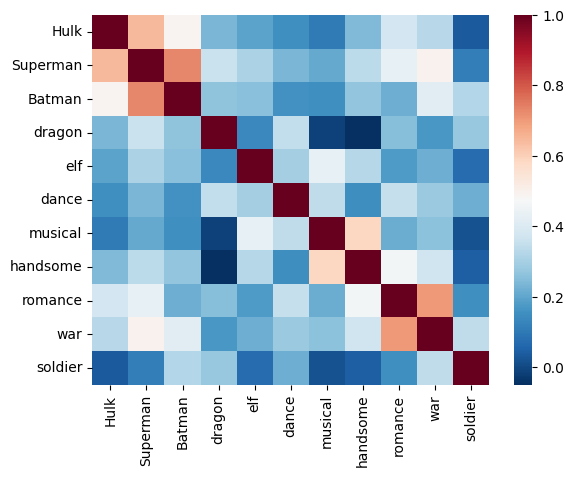

In [55]:
# nlp = spacy.load("en_core_web_md")
import seaborn
tokens = nlp_eng(u'Hulk Superman Batman dragon elf dance musical handsome romance war soldier')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

labels = [a.text for a in tokens]
print(labels)

M = np.zeros((len(tokens), len(tokens)))
for idx, token1 in enumerate(tokens):
    for idy, token2 in enumerate(tokens):
        M[idx, idy] = token1.similarity(token2)

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(M, cmap = "RdBu_r", xticklabels=labels,  yticklabels=labels)
plt.show()


El True 21.886078 True
hijo True 15.926699 True
desobediente True 22.016182 True
['El', 'hijo', 'desobediente']


<ipython-input-56-33129e03f741>:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  M[idx, idy] = token1.similarity(token2)


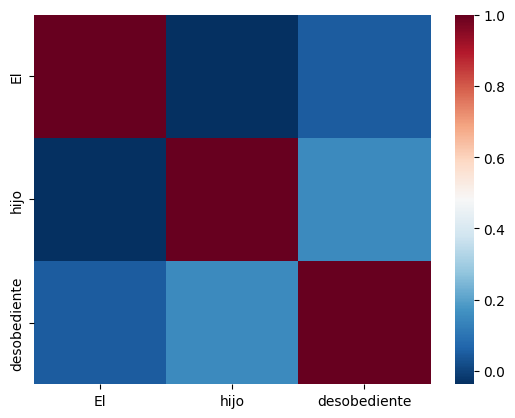

In [56]:
# nlp = spacy.load("en_core_web_md")
import seaborn
tokens = nlp_es(u'El hijo desobediente')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

labels = [a.text for a in tokens]
print(labels)

M = np.zeros((len(tokens), len(tokens)))
for idx, token1 in enumerate(tokens):
    for idy, token2 in enumerate(tokens):
        M[idx, idy] = token1.similarity(token2)

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(M, cmap = "RdBu_r", xticklabels=labels,  yticklabels=labels)
plt.show()


### Ejercicio: Hacer una tabla de similitudes con una frase en español

#### Representación con sklearn

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
documents = (
"The sky is blue",
"The sun is bright",
"The sun in the sky is bright",
"We can see the shining sun, the bright sun"
)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape

(4, 11)

**cos_sim(X1, [X1, X2, X3]])** = cos_sim(X1,X1), cos_sim(X1,X2), cos_sim(X1,X3)

In [59]:
cosine_similarity(tfidf_matrix[0], tfidf_matrix)

array([[1.        , 0.36651513, 0.52305744, 0.13448867]])

In [60]:
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.36651513, 0.52305744, 0.13448867],
       [0.36651513, 1.        , 0.72875508, 0.54139736],
       [0.52305744, 0.72875508, 1.        , 0.43661098],
       [0.13448867, 0.54139736, 0.43661098, 1.        ]])

## Usando spacy y sklearn

In [61]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# this is just making sure we have loaded in our word vectors
if 'nlp' not in locals():
    nlp = spacy.load('en_core_web_lg')

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]


words = ['black car', 'black truck', 'red dragon', 'big data', 'black horse', 'red fish' , 'lion']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best
# way to project the data down that will best maintain the relative distances
# between data points. It will store these intructioons on how to transform the data.
words_vectors = get_word_vectors(words)

print(type(words_vectors))
for item in words_vectors:
    print(len(item))

pca.fit(words_vectors)

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

<class 'list'>
96
96
96
96
96
96
96


array([[-7.54078553, -3.43598865],
       [-1.63721458,  1.48949864],
       [ 1.39367392,  7.81913196],
       [ 3.36597423, -0.96097218],
       [-7.81795023, -6.03985209],
       [ 0.68476907,  8.40964573],
       [11.55153311, -7.28146341]])

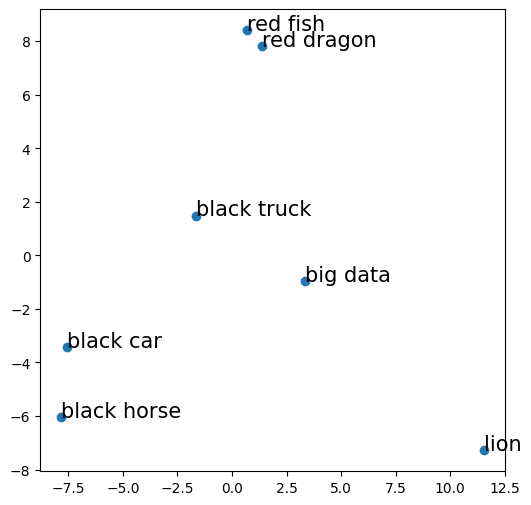

In [62]:
# create a nice big plot
plt.figure(figsize=(6,6))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

### Ejercicio: Probar PCA con más palabras en español

In [63]:
import es_core_news_sm
nlp = spacy.load('es_core_news_sm')


def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]


words = ['correo electrónico', 'horno de microondas', 'microprocesador', 'computadora', 'circuito electrónico']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best
# way to project the data down that will best maintain the relative distances
# between data points. It will store these intructioons on how to transform the data.
words_vectors = get_word_vectors(words)

print(type(words_vectors))
for item in words_vectors:
    print(len(item))

pca.fit(words_vectors)

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

<class 'list'>
96
96
96
96
96


array([[-6.5546998 , -4.96146193],
       [-1.15446978,  5.07169982],
       [-2.0943036 ,  9.57992215],
       [16.58120294, -3.09431047],
       [-6.77772975, -6.59584957]])

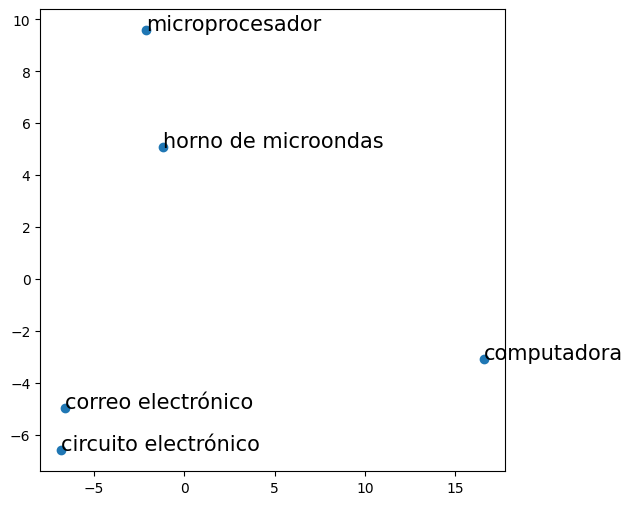

In [64]:
# create a nice big plot
plt.figure(figsize=(6,6))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()